ПОПУЛЯЦИЯ ЧЕЛОВЕЧЕСТВА В СТРАНАХ

In [22]:
import pandas as pd

df = pd.read_csv(
    ".//static//csv///world-population-by-country-2020.csv", index_col="no"
)

df["Population2020"] = df["Population2020"].apply(
    lambda x: int("".join(x.split(",")))
)
df["Net Change"] = df["NetChange"].apply(
    lambda x: int("".join(x.split(",")))
)
df["Yearly Change"] = df["Yearly Change"].apply(lambda x: float("".join(x.rstrip("%"))))
df["LandArea"] = df["LandArea"].apply(
    lambda x: int("".join(x.split(",")))
)

df.info()
# print(df['date'].head)

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 235
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population2020           235 non-null    int64  
 2   Yearly Change            235 non-null    float64
 3   NetChange                235 non-null    object 
 4   Density  (P/Km²)         235 non-null    object 
 5   LandArea                 235 non-null    int64  
 6   Migrants (net)           201 non-null    object 
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
 11  Net Change               235 non-null    int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 23.9+ KB


Разделим на 3 выборки


In [23]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 150
Размер контрольной выборки: 38
Размер тестовой выборки: 47


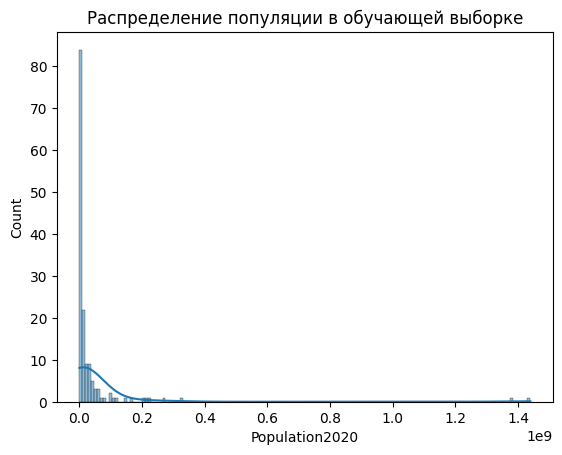

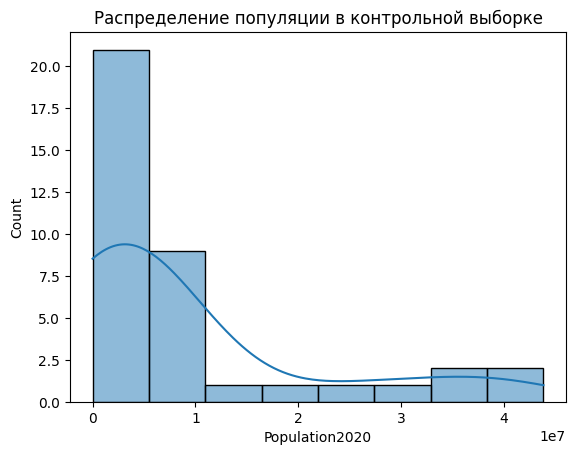

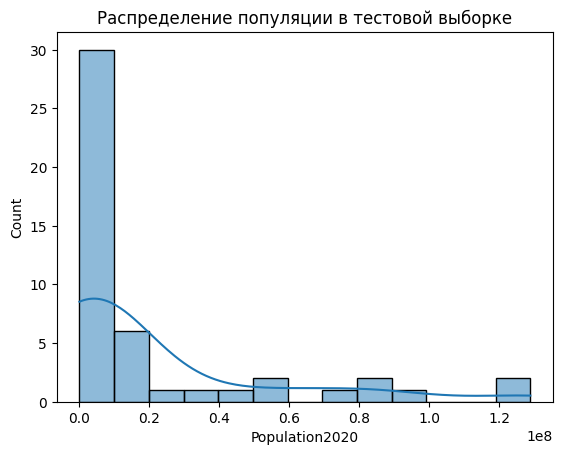

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма распределения объема в обучающей выборке
sns.histplot(train_data["Population2020"], kde=True)
plt.title('Распределение популяции в обучающей выборке')
plt.show()

# Гистограмма распределения объема в контрольной выборке
sns.histplot(val_data["Population2020"], kde=True)
plt.title('Распределение популяции в контрольной выборке')
plt.show()

# Гистограмма распределения объема в тестовой выборке
sns.histplot(test_data["Population2020"], kde=True)
plt.title("Распределение популяции в тестовой выборке")
plt.show()

## Процесс конструирования признаков



### Унитарное кодирование категориальных признаков (one-hot encoding)


In [25]:
import pandas as pd

categorical_features = [
]

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

### Дискретизация числовых признаков 

In [26]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


labels = ["small country", "medium country", "big country"]
num_bins = 3

hist1, bins1 = np.histogram(
    df["LandArea"].fillna(df["LandArea"].median()), bins=num_bins
)
bins1, hist1

pd.concat([df["LandArea"], pd.cut(df["LandArea"], list(bins1))], axis=1).tail(20)

LandArea            LandArea
no                              
216       53  (0.0, 5458956.667]
217      160  (0.0, 5458956.667]
218       60  (0.0, 5458956.667]
219       10  (0.0, 5458956.667]
220      150  (0.0, 5458956.667]
221      328  (0.0, 5458956.667]
222      460  (0.0, 5458956.667]
223      240  (0.0, 5458956.667]
224       90  (0.0, 5458956.667]
225       30  (0.0, 5458956.667]
226      140  (0.0, 5458956.667]
227       20  (0.0, 5458956.667]
228       21  (0.0, 5458956.667]
229      390  (0.0, 5458956.667]
230      230  (0.0, 5458956.667]
231      100  (0.0, 5458956.667]
232    12170  (0.0, 5458956.667]
233      260  (0.0, 5458956.667]
234       10  (0.0, 5458956.667]
235        0                 NaN

In [27]:
pd.concat(
    [df["LandArea"], pd.cut(df["LandArea"], list(bins1), labels=labels)], axis=1
).head(20)

LandArea        LandArea
no                          
1    9388211  medium country
2    2973190   small country
3    9147420  medium country
4    1811570   small country
5     770880   small country
6    8358140  medium country
7     910770   small country
8     130170   small country
9   16376870     big country
10   1943950   small country
11    364555   small country
12   1000000   small country
13    298170   small country
14    995450   small country
15    310070   small country
16   2267050   small country
17    769630   small country
18   1628550   small country
19    348560   small country
20    510890   small country

### Ручной синтез

In [28]:
# Пример синтеза признака площади страны в кв км на душу человека
train_data_encoded["squareforman"] = (
    train_data_encoded["LandArea"] / train_data_encoded["Population2020"]
)
val_data_encoded["squareforman"] = (
    val_data_encoded["LandArea"] / val_data_encoded["Population2020"]
)
test_data_encoded["squareforman"] = (
    test_data_encoded["LandArea"] / test_data_encoded["Population2020"]
)

Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ["Population2020", "Yearly Change"]

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

### Конструирование признаков с применением фреймворка Featuretools

In [30]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='pop')

es = es.add_dataframe(dataframe_name='dop', dataframe=train_data_encoded, index='id')


# Генерация признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=es, target_dataframe_name="dop", max_depth=2
)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


### Оценка качества каждого набора признаков
Предсказательная способность
Метрики: RMSE, MAE, R²

Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

Скорость вычисления
Методы: Измерение времени выполнения генерации признаков и обучения модели.

Надежность
Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

Корреляция
Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

Цельность
Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [31]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='pop')
es = es.add_dataframe(
    dataframe_name="dop", dataframe=train_data_encoded, index="id"
)

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=es, target_dataframe_name="dop", max_depth=2
)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.03387638150888035
R²: 0.9814104214666138
MAE: 0.015316153649943631
Cross-validated RMSE: 0.7480546038440666
Train RMSE: 0.24468562210527503
Train R²: 0.9401289463349545
Train MAE: 0.049477658845671284


d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


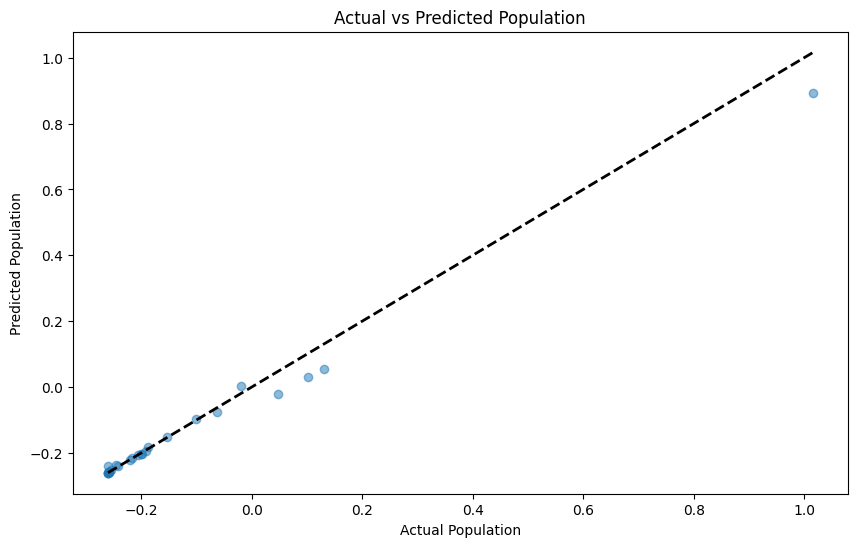

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop("Population2020", axis=1)
y_train = feature_matrix["Population2020"]
X_val = val_feature_matrix.drop("Population2020", axis=1)
y_val = val_feature_matrix["Population2020"]
X_test = test_feature_matrix.drop("Population2020", axis=1)
y_test = test_feature_matrix["Population2020"]

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns


# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Actual vs Predicted Population")
plt.show()

Точность предсказаний: Модель показывает довольно высокий R² (0.98), что указывает на хорошее объяснение вариации. Значения RMSE и MAE довольно низки, что говорит о том, что модель достаточно точно предсказывает цены.

Переобучение: Разница между RMSE на обучающей и тестовой выборках не очень большая, что указывает на то, что переобучение не является критическим. Однако, стоит быть осторожным и продолжать мониторинг этого показателя.
